# **CONVOLUTIONAL NEURAL NETWORKS**

Our brain uses extremly large interconnected network of neurons for processing information.A neuron collects information from other neurons and sums it .If the sum is greater than the thrshold then it fires the information to other neurons.

A neural network is a a computer system modelled on the human brain and nervous system.
think neuron as a thing that holds number.

The following dataset has images with dimension of 28x28 pixels.So there are a total of 784 neurons.
Each one of these holds a number that represents a grayscale value of the pixel 0 for black pixel and 255 for white pixel.The numbr on the neuron is known as its "Activation"

All of these 784 neurons make up the first layer of the network
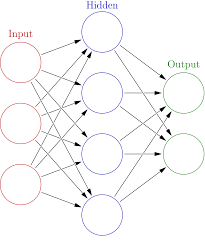

The last layer in this dataset are numbers from 1 to 10 indicating the type of clothing article.
Inbetween input and output there are hidden layers.
Each layer can apply any function to the previous layer .
Hidden layer activations are tranformed by the output layer into whatever scale you wanted your output to be.

In this kernel we are going to perform image classification which is a task of taking an input image and outputting a class of that image using the features that best describes the image.

***Convolutional Neural Networks*** are used in image processing and recognition.

After the input layer,the first layer in CNN is the convolutional layer.
 In the convolutional layer ,we are going to apply a ***filter*** to the image(also known as ***kernel***).
 Take for example we have an image in the form of an 8X8 matrix which contains an array of numbers.
 
  We apply a 3X3 filter to this matrix which also is an array of number known ad ***'weights'***.
  
At first the position of the matrix would be at the top left corner.This matrix is moved along the image in a grid manner.All the elements of the matrix are multiplied with the elements of the image and are summed.
Now we get a single value.Now we repeat this process for every location on the entire image
![](https://i.imgur.com/Z6pYVXR.png)
So simply convolutions use a kernel matrix to scan a given image and apply a filter to obtain a certain effect.
The final result which you obtain is called as 'Activation Map' or 'Feature Map'.

The next step is to apply ***RELU(Rectified Linear Units) activation function***.
RELU layers are used to add non linearity to the feature map.It enhances the sparsity or how scattered the feature map is.
On applying the RELUfunction what happens is that the negatives in the matrix becomes zero.RELU enhances the features of the image.

![](http://https://www.google.co.in/imgres?imgurl=https%3A%2F%2Fi.imgur.com%2FEolgnXi.jpgg&imgrefurl=https%3A%2F%2Fhashrocket.com%2Fblog%2Fposts%2Fa-friendly-introduction-to-convolutional-neural-networks&docid=UOJF7qrgWyXlyM&tbnid=Sf9duvntQISsLM%3A&vet=12ahUKEwjPqvGrq4jfAhXNR30KHY19BBY4ZBAzKAIwAnoECAEQAw..i&w=871&h=424&bih=626&biw=1366&q=relu%20function%20in%20matrix&ved=2ahUKEwjPqvGrq4jfAhXNR30KHY19BBY4ZBAzKAIwAnoECAEQAw&iact=mrc&uact=8)

Different activation functions
![](https://www.google.co.in/imgres?imgurl=https%3A%2F%2Fqph.fs.quoracdn.net%2Fmain-qimg-07bc0ec05532caf5ebe8b4c82d0f5ca3&imgrefurl=https%3A%2F%2Fwww.quora.com%2FWhy-is-ReLU-the-most-common-activation-function-used-in-neural-networks&docid=AyjpGvpwzg7fTM&tbnid=ndKtpfstLKXm_M%3A&vet=10ahUKEwjNmoTWq4jfAhVQSX0KHQ7CAyoQMwhJKAswCw..i&w=602&h=303&bih=626&biw=1366&q=neural%20networks%20relu&ved=0ahUKEwjNmoTWq4jfAhVQSX0KHQ7CAyoQMwhJKAswCw&iact=mrc&uact=8)

Next step that we are going to perform is MaxPooling.
Pooling or downsampling helps reduce the feature map dimensionality.
Used to improve computational efficiency while preserving its features
 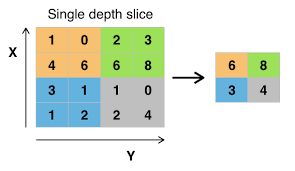
 MaxPooling with a Stride=2(Stride=Movement)
 So the 2X2 filter starts from the top left,takes the maximum value and then moves two grids away(stride=2).This is performed 4 times and we get a 2X2 matrix as output.
 
 So what we did was we reduced the feature dimensionality, we moved from a 4X4 to a 2x2 matrix.Only the most prominent features were kept in the 2X2 matrix.MaxPooling also helps the generalize the model
 
 Next step is Flattening.
 Flattening is the process of converting all the resultant 2 dimensional arrays into a single long continuous linear vector.
 Basically that all the values row by row and convert them into one single column.
 
 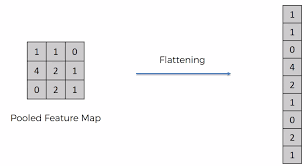
 The last stage is called a dense layer, which is just an artificial neural network (ANN) classifier.
 And an ANN classifier needs individual features. This means it needs a feature vector.
Therefore, you need to convert the output of the convolutional part of the CNN into a 1D feature vector, to be used by the ANN part of it.

The last layer is the ***Fully Connected Layer***. This layer basically takes an input volume (whatever the output is of the conv or ReLU or pool layer preceding it) and outputs an N dimensional vector where N is the number of classes that the program has to choose from.In this case our N is 10 since we have 10 types of clothing articles
The way this fully connected layer works is that it looks at the output of the previous layer and determines which features most correlate to a particular class.

Now,lets us write the code for this dataset.





**IMPORTING DATASET**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_df=pd.read_csv('../input/fashion-mnist_train.csv',sep=',')
test_df=pd.read_csv('../input/fashion-mnist_test.csv',sep=',')

**VISUALIZATION**

In [ ]:
train_df.head()

In [ ]:
test_df.head()

In [ ]:
train_df.shape

In [ ]:
test_df.shape

In [ ]:
training=np.array(train_df,dtype='float32')

In [ ]:
testing=np.array(test_df,dtype='float32')

In [ ]:
import random
i=random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label=training[i,0]
label

**MODEL TRAINING**

In [ ]:
X_train=training[:,1:]/255
'''Normalization ((X-Xmin)/(Xmax-Xmin))=(X-0)/(255-0)
CNN works better when the data is normalized.Pixel takes values between 0 to 255'''
Y_train=training[:,0]
X_test=testing[:,1:]/255
Y_test=testing[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_validate,Y_train,Y_validate=train_test_split(X_train,Y_train,test_size=0.2,random_state=10)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],*(28,28,1))
X_test=X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate=X_validate.reshape(X_validate.shape[0],*(28,28,1))
#validation dataset to help the model generalize
#reshape data to be in the form of 28X28

In [ ]:
X_validate.shape

In [ ]:
import keras
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [ ]:
cnn_model=Sequential()
cnn_model.add(Conv2D(32,3,3,input_shape=(28,28,1),activation='relu'))
#Conv2D=convolutional layer
#32 indicates the number of kernels,with 3X3 dimensions
#activation function=RELU

In [ ]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
#pooling size=2X2 matrix

In [ ]:
cnn_model.add(Flatten())
#Flattening 

In [ ]:
cnn_model.add(Dense(output_dim=32,activation='relu'))
#dense layer ,hidden layer
cnn_model.add(Dense(output_dim=10,activation='sigmoid'))


In [ ]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
#Adam optimizer,loss= categorial cross entropy we use cross categorial because we are simply categorizing our dataset

In [ ]:
epochs=40
cnn_model.fit(X_train,Y_train,batch_size=512,nb_epoch=epochs,verbose=1,validation_data=(X_validate,Y_validate))
#epochs=50, how many timeswe are going to present our dataset and updating the weights

**EVALUATION**

In [ ]:
evaluation=cnn_model.evaluate(X_test,Y_test)
print('Test Accuracy::{:.3f}'.format(evaluation[1]))


In [ ]:
predicted_classes=cnn_model.predict_classes(X_test)
predicted_classes

In [ ]:
L=5
W=5
fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L * W):
   axes[i].imshow(X_test[i].reshape(28,28))
   axes[i].set_title("Prediction class={:0.1f}\n,true class={:0.1f}".format(predicted_classes[i],Y_test[i]))
   axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)